/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-

=== Classification Report ===
                     precision    recall  f1-score   support

 Elevated Proneness       0.20      1.00      0.33         1
     High Proneness       0.00      0.00      0.00         1
      Low Proneness       0.00      0.00      0.00         1
 Moderate Proneness       0.00      0.00      0.00         1
Very High Proneness       1.00      0.50      0.67         2

           accuracy                           0.33         6
          macro avg       0.24      0.30      0.20         6
       weighted avg       0.37      0.33      0.28         6

=== Accuracy Score ===
0.3333333333333333


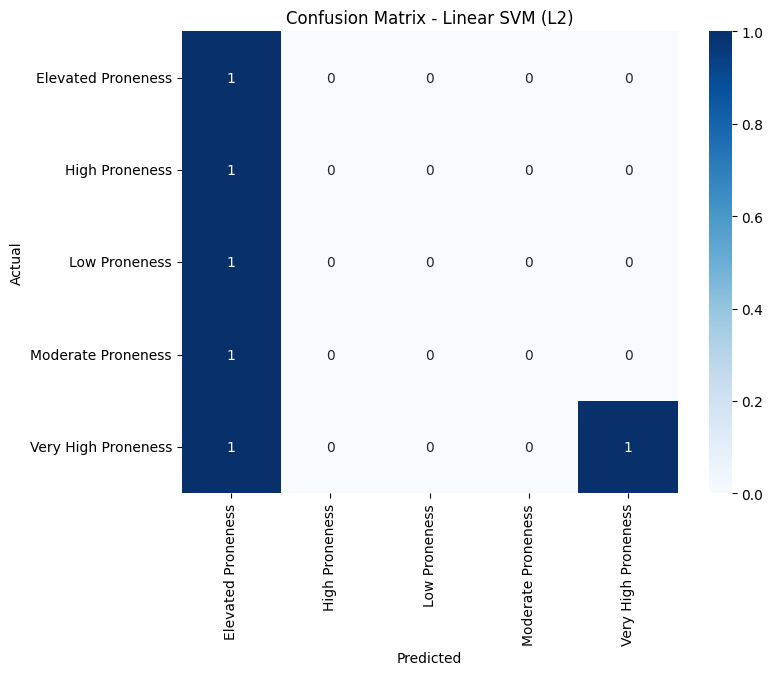

In [8]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Baca dan bersihkan data
df = pd.read_excel("schizoCase.xlsx")
df = df.dropna(subset=["Schizophrenia"])  # Hapus baris tanpa label
df = df.drop(columns=["Name"])  # Hapus kolom non-fitur

# 2. Pisahkan fitur dan label
X = df.drop(columns=["Schizophrenia"])
y = df["Schizophrenia"]

# 3. Encode label string → angka
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_
class_labels = label_encoder.transform(class_names)  # [0, 1, 2, 3, 4]

# 4. Split data (gunakan test_size yang cukup besar agar semua kelas masuk)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)

# 5. Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Buat dan latih model Linear SVM + Kalibrasi
linear_svc = LinearSVC(penalty='l2', C=1.0, max_iter=10000)
linear_svc.fit(X_train_scaled, y_train)

svm_model = CalibratedClassifierCV(linear_svc, cv='prefit')
svm_model.fit(X_train_scaled, y_train)

# 7. Prediksi
y_pred = svm_model.predict(X_test_scaled)

# 8. Evaluasi
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, labels=class_labels, target_names=class_names))
print("=== Accuracy Score ===")
print(accuracy_score(y_test, y_pred))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Linear SVM (L2)")
plt.show()

=== Classification Report (L2 + SMOTE) ===
                     precision    recall  f1-score   support

 Elevated Proneness       0.20      1.00      0.33         1
     High Proneness       0.00      0.00      0.00         1
      Low Proneness       0.00      0.00      0.00         1
 Moderate Proneness       0.00      0.00      0.00         1
Very High Proneness       1.00      0.50      0.67         2

           accuracy                           0.33         6
          macro avg       0.24      0.30      0.20         6
       weighted avg       0.37      0.33      0.28         6

=== Accuracy Score ===
0.3333


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


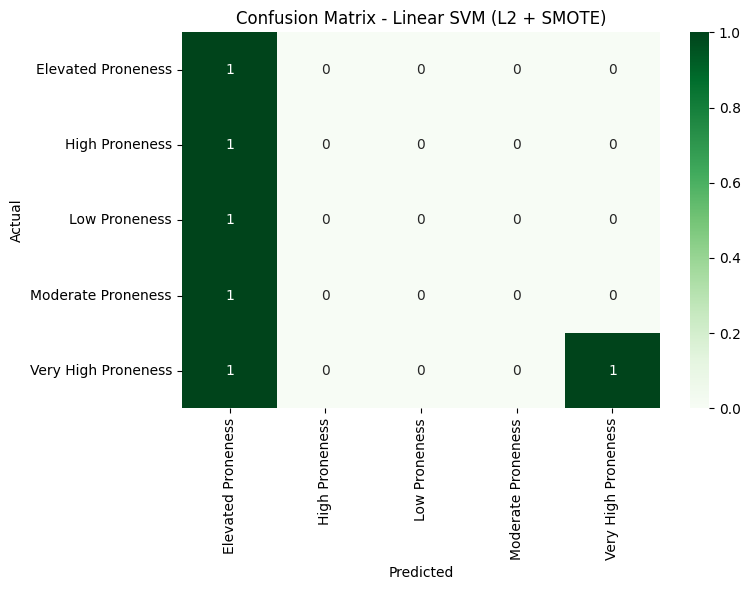

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# 1. Baca dan bersihkan data
df = pd.read_excel("schizoCase.xlsx")
df = df.dropna(subset=["Schizophrenia"])
df = df.drop(columns=["Name"], errors="ignore")

# 2. Pisahkan fitur dan label
X = df.drop(columns=["Schizophrenia"])
y = df["Schizophrenia"]

# 3. Encode label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_
class_labels = label_encoder.transform(class_names)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)

# 5. Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Hapus kelas minoritas < 2 dari data training
counter = Counter(y_train)
valid_classes = [cls for cls, count in counter.items() if count >= 2]
mask = np.isin(y_train, valid_classes)
X_train_filtered = X_train_scaled[mask]
y_train_filtered = y_train[mask]

# 7. SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_res, y_train_res = smote.fit_resample(X_train_filtered, y_train_filtered)

# 8. Linear SVM dengan L2 regularization
svc_l2 = LinearSVC(penalty='l2', dual=True, C=1.0, max_iter=10000, random_state=42)
svc_l2.fit(X_train_res, y_train_res)

# 9. Prediksi
y_pred = svc_l2.predict(X_test_scaled)

# 10. Evaluasi
print("=== Classification Report (L2 + SMOTE) ===")
print(classification_report(y_test, y_pred, labels=class_labels, target_names=class_names))
print("=== Accuracy Score ===")
print(f"{accuracy_score(y_test, y_pred):.4f}")

# 11. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Linear SVM (L2 + SMOTE)")
plt.tight_layout()
plt.show()